## Part 1

In [1]:
from itertools import combinations

In [2]:
TEST_INFILE = "inputs/day_9_test_1.txt"
TEST_INFILE_2 = "inputs/day_9_test_2.txt"
INFILE = "inputs/day_9.txt"

#with open(TEST_INFILE) as infile:
#with open(TEST_INFILE_2) as infile:
with open(INFILE) as infile:
    lines = infile.read().splitlines()
    tiles = [tuple(int(e) for e in line.split(",")) for line in lines]

In [3]:
def area(t1, t2):
    return (abs(t1[0] - t2[0]) + 1) * (abs(t1[1] - t2[1]) + 1)

assert area((2, 5), (9, 7)) == 24
assert area((7, 1), (11, 7)) == 35
assert area((7, 3), (2, 3)) == 6

In [4]:
max(area(t1, t2) for t1, t2 in combinations(tiles, 2))

4781377701

## Part 2

In [5]:
from itertools import pairwise
import matplotlib.pyplot as plt
import seaborn as sns

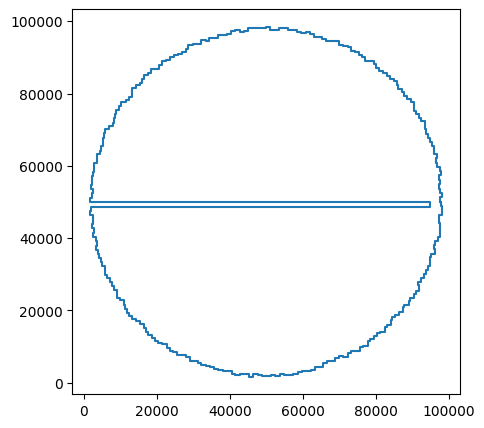

In [6]:
plt.figure(figsize=(5, 5))
plt.plot([t[0] for t in tiles], [t[1] for t in tiles], ls="-")

In [7]:
edges = tuple(pairwise(tiles)) + tuple([(tiles[-1], tiles[0])])

In [8]:
sorted([(e, abs(e[1][0] - e[0][0]) + abs(e[1][1] - e[0][1])) for e in edges], key=lambda t: -t[1])[:2]

[(((1656, 50072), (94821, 50072)), 93165),
 (((94821, 48704), (1947, 48704)), 92874)]

In [9]:
lower_y = 48704
upper_y = 50072
def good_combo(t1, t2):
    # they should be on the same side of the big notch
    if t1[1] <= lower_y and t2[1] >= upper_y:
        return False
    if t2[1] <= lower_y and t1[1] >= upper_y:
        return False
    return True

good_combos = list(filter(lambda t: good_combo(t[0], t[1]), combinations(tiles, 2)))
len(list(combinations(tiles, 2))), len(list(good_combos))


(122760, 61760)

In [10]:
def get_all_corners(t1, t2):
    if t1[0] == t2[0] or t1[1] == t2[1]:
        return (t1, t2)
    else:
        # keep the x's and swap the y's
        return (t1, t2, (t1[0], t2[1]), (t2[0], t1[1]))

In [ ]:
def ccw(p1, p2, p3):
    return (p3[1] - p1[1]) * (p2[0] - p1[0]) > (p2[1] - p1[1]) * (p3[0] - p1[0])

def segments_intersect(A, B, C, D):
    if not (ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)):
        return False
    
    # exclude endpoints
    if A == C or A == D or B == C or B == D:
        return False
    
    return True

def count_crossings(A, B, edges):
    crossings = 0
    for P1, P2 in edges:
        if segments_intersect(A, B, P1, P2):
            crossings += 1
    return crossings

def get_crossings(A, B, edges):
    crossings = []
    for P1, P2 in edges:
        if segments_intersect(A, B, P1, P2):
            crossings.append((P1, P2))
    return crossings

def on_boundary(p, edges):
    for p1, p2 in edges:
        # horizontal
        if p1[0] == p2[0]:
            if p[0] == p1[0] and p[1] in range(min(p1[1], p2[1]), max(p1[1], p2[1]) + 1):
                return True
        else:
            # vertical
            if p[1] == p1[1] and p[0] in range(min(p1[0], p2[0]), max(p1[0], p2[0]) + 1):
                return True
    return False

In [13]:
def draw_area(t1, t2):
    cs = sorted(get_all_corners(t1, t2), key=lambda t: t[0])
    cs.append(cs[0])

    plt.figure(figsize=(5, 5))
    plt.plot([t[0] for t in tiles], [t[1] for t in tiles], ls="-")
    plt.plot([c[0] for c in cs], [c[1] for c in cs], color="red", ls="-")
    plt.show()


In [ ]:
DEBUG = False

areas = []
for t1, t2 in good_combos:
    if DEBUG: print(f"{t1}, {t2}")
    valid = True

    corners = get_all_corners(t1, t2)
    if DEBUG: print(f"Corners are {corners}")
    
    for corner in corners:
        corner_on_boundary = on_boundary(corner, edges) or corner in tiles
        crossings = count_crossings(corner, (0, 0), edges)
        inside = corner_on_boundary or crossings % 2  == 1
        if DEBUG: print(f"Corner {corner} is inside={inside}")
        if DEBUG: print(f"\tCrosses {crossings} times.")
        if not inside:
            valid = False
            break
    
    if valid:
        areas.append((t1, t2, area(t1, t2)))
    else:
        if DEBUG: print("Invalid!")

In [28]:
max(a[2] for a in areas)

1470616992

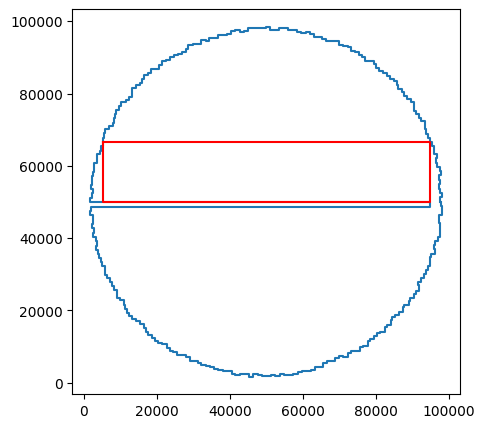

In [35]:
draw_area((5254, 66490), (94821, 50072))

In [ ]:
# create another small test example

# (0, 0)                                          (20, 0)
#
#.             (10, 5)          (15, 5)
#
# (0, 10)      (10, 10)         (15, 10)          (20, 10)